In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy import stats as st
import itertools as it
from tqdm import notebook as tqdm
from matplotlib.animation import FuncAnimation
import random,os
import multiprocessing as mp
import modelutils
plt.ion()

In [2]:
npeople=300
ndays=21

locations = ['Bechtel','Lloyd','Page','Ruddock','Chandler']
ntrials = 10 #number of trials used to construct confidence intervals
lambda_=5e-4  #use for 300 kids
#lambda_ = 3e-3  #use for 60 kids
mini=False

### Main Simulation

In [3]:
agent_states_trials = np.zeros(shape=[ntrials,ndays,11,npeople])
agent_states_nolunch_trials = np.zeros(shape=[ntrials,ndays,11,npeople])

def simulation_homelunch(x):
    agent_locations,agent_states = modelutils.dorm_simulation(ndays,lunchloc='Home',lambda_=lambda_,mini=mini)
    print('finished!')
    return agent_states

def simulation_chandler(x):
    agent_locations,agent_states = modelutils.dorm_simulation(ndays,lunchloc='Chandler',lambda_=lambda_,mini=mini)
    print('finished!')
    return agent_states

with mp.Pool(processes=8) as pool:
    agent_states_trials= pool.map(simulation_homelunch,np.arange(ntrials))
    agent_states_nolunch_trials = pool.map(simulation_chandler,np.arange(ntrials))
    
agent_states_trials = np.concatenate([np.expand_dims(x,axis=0) for x in agent_states_trials],axis=0)
agent_states_nolunch_trials = np.concatenate([np.expand_dims(x,axis=0) for x in agent_states_nolunch_trials],axis=0)

Day:  20 / 21
finished!


Day:  20 / 21
finished!


Day:  20 / 21
finished!
Day:  20 / 21
finished!
Day:  20 / 21
finished!
Day:  20 / 21
finished!
Day:  20 / 21
finished!
Day:  20 / 21
finished!
Day:  20 / 21
finished!
Day:  20 / 21
finished!


Day:  20 / 21
finished!


Day:  20 / 21
finished!


Day:  20 / 21
finished!
Day:  20 / 21
finished!
Day:  20 / 21
finished!
Day:  20 / 21
finished!
Day:  20 / 21
finished!
Day:  20 / 21
finished!
Day:  20 / 21
finished!
Day:  20 / 21
finished!


In [4]:

agent_states_trials_sum = np.sum(agent_states_trials,axis=-1)/npeople
agent_states_nolunch_trials_sum = np.sum(agent_states_nolunch_trials,axis=-1)/npeople



agent_states_trials_reduced = np.zeros([ntrials,ndays,5])
agent_states_nolunch_trials_reduced = np.zeros([ntrials,ndays,5])
for seir_idx in range(5):
    agent_states_trials_reduced[:,:,0] =np.sum(agent_states_trials_sum[:,:,0:3],axis=-1)
    agent_states_trials_reduced[:,:,1] = np.sum(agent_states_trials_sum[:,:,3:6],axis=-1)
    agent_states_trials_reduced[:,:,2] = np.sum(agent_states_trials_sum[:,:,6:9],axis=-1)
    agent_states_trials_reduced[:,:,3] = agent_states_trials_sum[:,:,9]
    agent_states_trials_reduced[:,:,4] = agent_states_trials_sum[:,:,10]
    
    agent_states_nolunch_trials_reduced[:,:,0] =np.sum(agent_states_nolunch_trials_sum[:,:,0:3],axis=-1)
    agent_states_nolunch_trials_reduced[:,:,1] = np.sum(agent_states_nolunch_trials_sum[:,:,3:6],axis=-1)
    agent_states_nolunch_trials_reduced[:,:,2] = np.sum(agent_states_nolunch_trials_sum[:,:,6:9],axis=-1)
    agent_states_nolunch_trials_reduced[:,:,3] = agent_states_nolunch_trials_sum[:,:,9]
    agent_states_nolunch_trials_reduced[:,:,4] = agent_states_nolunch_trials_sum[:,:,10]

    
percentiles = [10,30,90,70]
agent_states_percentiles = np.zeros([len(percentiles),ndays,5])
agent_states_nolunch_percentiles = np.zeros([len(percentiles),ndays,5])

for p_idx in range(len(percentiles)):
    agent_states_percentiles[p_idx,...]=np.percentile(agent_states_trials_reduced,percentiles[p_idx],axis=0)
    agent_states_nolunch_percentiles[p_idx,...]=np.percentile(agent_states_nolunch_trials_reduced,percentiles[p_idx],axis=0)


Visualization and animation code below.

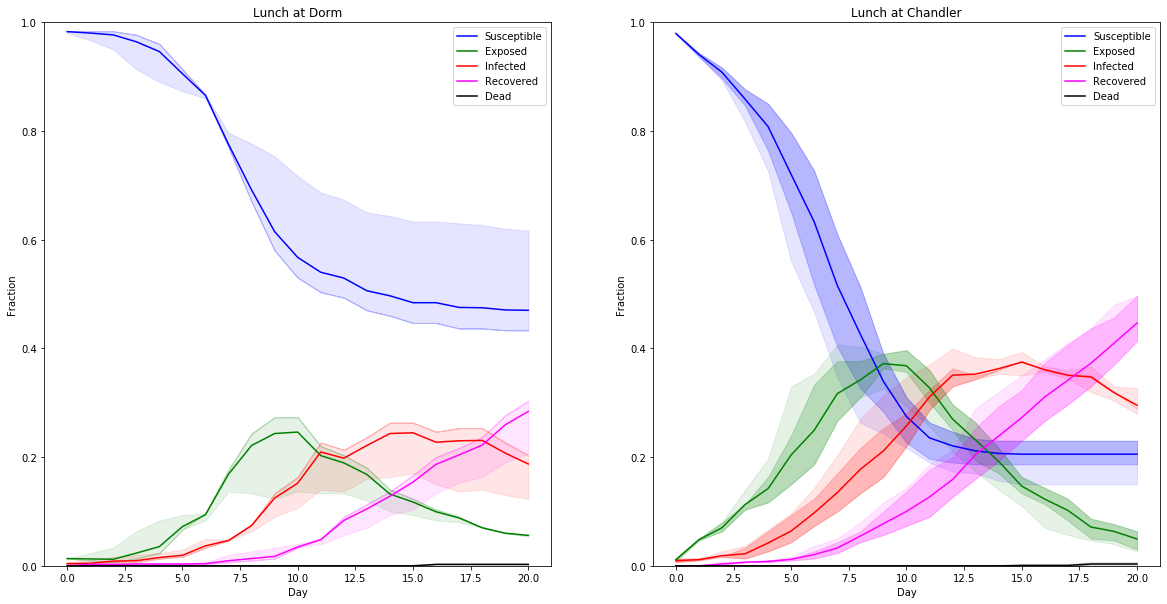

In [5]:
alphalist = np.linspace(0.1,.3,3)
colorlist = ['blue','green','red','magenta','black']
time = np.arange(ndays)

fig,ax = plt.subplots(ncols=2,figsize=[20,10])

for plot_idx in range(len(percentiles)//2):
    for seir_idx in range(5):
        ax[0].fill_between(time,agent_states_percentiles[plot_idx,:,seir_idx],agent_states_percentiles[plot_idx+2,:,seir_idx],color=colorlist[seir_idx],alpha=alphalist[plot_idx])
        ax[1].fill_between(time,agent_states_nolunch_percentiles[plot_idx,:,seir_idx],agent_states_nolunch_percentiles[plot_idx+2,:,seir_idx],color=colorlist[seir_idx],alpha=alphalist[plot_idx])
        
        if plot_idx==1:
            ax[0].plot(time,np.mean(agent_states_trials_reduced[:,:,seir_idx],axis=0),color=colorlist[seir_idx])        
            ax[1].plot(time,np.mean(agent_states_nolunch_trials_reduced[:,:,seir_idx],axis=0),color=colorlist[seir_idx])  
ax[0].legend(['Susceptible','Exposed','Infected','Recovered','Dead'])
ax[1].legend(['Susceptible','Exposed','Infected','Recovered','Dead'])
ax[0].set_title('Lunch at Dorm')
ax[1].set_title('Lunch at Chandler')
ax[0].set_xlabel('Day')
ax[1].set_xlabel('Day')
ax[0].set_ylim([0,1])
ax[1].set_ylim([0,1])
ax[0].set_ylabel('Fraction')
ax[1].set_ylabel('Fraction')
plt.savefig('chandler_simulation_FINAL5.png')

for _ in range(2):
    os.system('say "Simulation finished, come get your shit"')

In [6]:
# means = np.mean(agent_states_trials_reduced[...],axis=0)       
# means_nolunch = np.mean(agent_states_nolunch_trials_reduced[...],axis=0)

# diffs = means_nolunch - means
# fig,ax = plt.subplots(figsize=(10,10))


# for plot_idx in range(5):
#     ax.plot(time,diffs[:,plot_idx],color=colorlist[plot_idx])
# ax.legend(['Susceptible','Exposed','Infected','Recovered','Dead'])
# ax.set_ylabel('Delta Fraction (Chandler - Dorm)')
# ax.set_xlabel('Day')
# ax.set_title('Difference in SEIRD Between Policies')

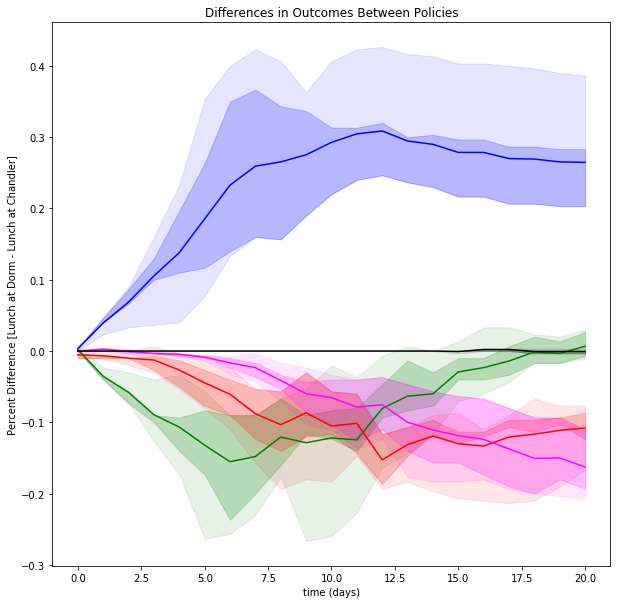

In [7]:
bootstrapped_differences = np.zeros([ntrials**2,ndays,11])
for idx1 in range(ntrials):
    for idx2 in range(ntrials):
        bootstrapped_differences[ntrials*(idx1)+idx2,...] =agent_states_trials_sum[idx1,...]- agent_states_nolunch_trials_sum[idx2,...]

        
        
bootstrap_reduced = np.zeros([ntrials**2,ndays,5])
for seir_idx in range(5):
    bootstrap_reduced[:,:,0] =np.sum(bootstrapped_differences[:,:,0:3],axis=-1)
    bootstrap_reduced[:,:,1] = np.sum(bootstrapped_differences[:,:,3:6],axis=-1)
    bootstrap_reduced[:,:,2] = np.sum(bootstrapped_differences[:,:,6:9],axis=-1)
    bootstrap_reduced[:,:,3] = bootstrapped_differences[:,:,9]
    bootstrap_reduced[:,:,4] = bootstrapped_differences[:,:,10]
    

    
    
    
bootstrap_percentiles = np.zeros([len(percentiles),ndays,5])

for p_idx in range(len(percentiles)):
    bootstrap_percentiles[p_idx,...]=np.percentile(bootstrap_reduced,percentiles[p_idx],axis=0)
    
    
    
fig,ax = plt.subplots(figsize=[10,10])
for plot_idx in range(len(percentiles)//2):
    for seir_idx in range(5):
        ax.fill_between(time,bootstrap_percentiles[plot_idx,:,seir_idx],bootstrap_percentiles[plot_idx+2,:,seir_idx],color=colorlist[seir_idx],alpha=alphalist[plot_idx])
        
        if plot_idx==1:
            ax.plot(time,np.mean(bootstrap_reduced[:,:,seir_idx],axis=0),color=colorlist[seir_idx])  
ax.set_xlabel('time (days)')
ax.set_ylabel('Percent Difference [Lunch at Dorm - Lunch at Chandler]')
ax.set_title('Differences in Outcomes Between Policies')
plt.savefig('chandler_policy_difference.png')

In [8]:
# ndays = 7
# print('Running Simulation...')
# agent_locations,agent_states = modelutils.dorm_simulation(ndays,lunchloc='Home',lambda_=1e-3,mini=True)
# agent_locations_nolunch,agent_states_nolunch = modelutils.dorm_simulation(ndays,lunchloc='Chandler',lambda_=1e-3,mini=True)
# #UNCOMMENT FOR MOVEMENT DEMO
# print("Finished!")
# def draw_dorm(agent_locations,disease_states,ax,background_map = plt.imread('dorms.png')):
#     """
#     agent locations is a list containing the location of each agent in the simulation
#     disease states is a list of booleans describing whether or not an individual is infected (0=healthy,1=infected)
#     ax is the matplotlib axes object you want to draw on
    
#     returns nothing, operates in-place
#     """

#     #group together states so they're not randomly shuffled
#     agent_locations = [x for _,x in sorted(zip(disease_states,agent_locations))] 
#     disease_states = sorted(disease_states)
#     locations = ['Bechtel','Lloyd','Page','Ruddock','Chandler','Quarantine']

#     alphaarray = np.linspace(0.25,1,num=3)
#     colors=['blue','green','red']

#     ax.imshow(background_map)


#     #add labels
#     ax.text(30,75,'Bechtel',size=14)
#     ax.text(215,450,'Lloyd',size=14)
#     ax.text(157,450,'Page',size=14)
#     ax.text(230,350,'Ruddock',size=14)
#     ax.text(170,340,'Chandler',size=14)
#     ax.text(230,210,'Quarantine',size=14)

#     #each value is a 2 list describing the ranges on x and y for that location
#     coor_ranges = {
#         'Bechtel': [[10,100],[5,60]],
#         'Lloyd': [[200,230],[377,450]],
#         'Page': [[150,200],[377,450]],
#         'Ruddock': [[230,275],[360,420]],
#         'Chandler': [[150,230],[340,385]],
#         'Quarantine':[[225,290],[5,200]]
  
#     }

#     people_counter = np.zeros(len(coor_ranges.keys())).astype(np.int)

#     gridlen = np.ceil(np.sqrt(len(agent_locations))).astype(np.int) #create enough gridpoints such that everyone has a space if they mob a single location (chandler)

#     #iterate over people and draw each on the axis
#     for person_idx in range(len(agent_locations)):

#         color_idx = int(disease_states[person_idx]//3)
#         alpha_idx = int(disease_states[person_idx] % 3)
#         if color_idx<=2:
#             color=colors[color_idx]
#             alpha=alphaarray[alpha_idx]
#         elif disease_states[person_idx]==9:
#             color='magenta'
#             alpha=1
#         elif disease_states[person_idx]==10:
#             color='black'
#             alpha=1

#         people_counter[locations.index(agent_locations[person_idx])] += 1

#         #draw a grid over the current location and place agent at specified spot
#         current_ranges = coor_ranges[agent_locations[person_idx]]
#         xx,yy = np.meshgrid(np.linspace(current_ranges[0][0],current_ranges[0][1],num=gridlen),np.linspace(current_ranges[1][0],current_ranges[1][1],num=gridlen))

#         #we need to convert the raw counts into row,col indices to get the coordinates of interest
#         pal = people_counter[locations.index(agent_locations[person_idx])]-1 #again, -1 is for indexing. pal stands for people at location

#         ax.plot(xx[pal//gridlen,pal%gridlen],yy[pal//gridlen,pal%gridlen],color=color,alpha=alpha,marker='*',markersize=10,markeredgecolor='black')








# ############################################################################


# def num2titlestr(n):
#     day = n//96
#     day_rem = n % 96
#     hours = day_rem // 12
    
#     fmt_hours = 9 + hours
#     if fmt_hours>12:
#         fmt_hours+=-12
#     fmt_hours= str(fmt_hours)
#     if len(fmt_hours)!=2:
#         fmt_hours = '0'+fmt_hours
    
#     hour_rem = day_rem % 12
#     minutes = hour_rem * 5
#     fmt_minutes = str(minutes)
#     if len(fmt_minutes) != 2:
#         fmt_minutes = '0'+fmt_minutes
#     return 'Day: '+str(day)+' / '+ fmt_hours+':'+fmt_minutes


# fig,ax = plt.subplots(ncols=2,figsize=[20,10])
# skip=3


# ax[0].set_xlabel('Timestep')
# ax[0].set_ylabel('Fraction')
# ax[1].set_xlabel('Timestep')
# ax[1].set_ylabel('Fraction')




# def update(i,skip=skip):
#     print('Step: ',i,' / ',agent_locations.shape[0],end='\r')
    
        
#     plot_indices = np.arange(0,i,step=skip)
        
#     ax[0].clear()
#     ax[1].clear()
#     ax[0].set_title('Lunch in Dorm /'+num2titlestr(i))
#     ax[1].set_title('Lunch in Chandler /'+num2titlestr(i))


    
    
#     disease_states = np.squeeze(agent_states[i//96,:,:])  #we need to "compress this one hot matrix (one hot along columns)"
#     disease_states = np.array([np.where(disease_states[:,x]==1)[0] for x in range(disease_states.shape[1])])
    
#     disease_states_nolunch = np.squeeze(agent_states_nolunch[i//96,:,:])  #we need to "compress this one hot matrix (one hot along columns)"
#     disease_states_nolunch = np.array([np.where(disease_states_nolunch[:,x]==1)[0] for x in range(disease_states_nolunch.shape[1])])
    
            
#     draw_dorm(agent_locations[i,:],disease_states,ax[0])
#     draw_dorm(agent_locations_nolunch[i,:],disease_states_nolunch,ax[1])
#     #ax[0].axis('off')
#     #ax[1].axis('off')
    


    


# anim = FuncAnimation(fig, update, frames=np.arange(0,agent_locations.shape[0]//2,skip), interval=200,repeat_delay=1000)

# anim.save('200715_movement_dorm.gif', dpi=80, writer='imagemagick')
# print('GIF Finished!')